In [1]:
# Importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
import statsmodels.api as sma
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [2]:
df = pd.read_csv('C:/USERS/YASHN/DATA FILE.CSV')
df

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,209591,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,209592,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [3]:
#displaying the max columns
pd.set_option("display.max_columns",None)
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016


In [4]:
# Checking the info of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 37 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   Unnamed: 0            209593 non-null  int64  
 1   label                 209593 non-null  int64  
 2   msisdn                209593 non-null  object 
 3   aon                   209593 non-null  float64
 4   daily_decr30          209593 non-null  float64
 5   daily_decr90          209593 non-null  float64
 6   rental30              209593 non-null  float64
 7   rental90              209593 non-null  float64
 8   last_rech_date_ma     209593 non-null  float64
 9   last_rech_date_da     209593 non-null  float64
 10  last_rech_amt_ma      209593 non-null  int64  
 11  cnt_ma_rech30         209593 non-null  int64  
 12  fr_ma_rech30          209593 non-null  float64
 13  sumamnt_ma_rech30     209593 non-null  float64
 14  medianamnt_ma_rech30  209593 non-null  float64
 15  

In [5]:
# Checking the dimensions
df.shape

(209593, 37)

In [6]:
# Checking null values
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

<AxesSubplot:>

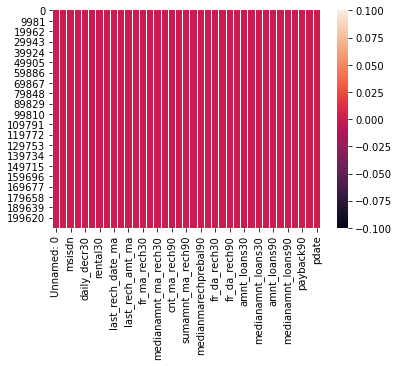

In [7]:
# plotting heatmap
sns.heatmap(df.isnull())

There are no null values in our dataset.

In [8]:
# Dropping the unrequired column
df.drop(['Unnamed: 0'],axis=1,inplace=True)
df

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,20-07-2016
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,10-08-2016
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,19-08-2016
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,06-06-2016
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,22-06-2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,4048,3,2.0,10404.0,3178.0,91.81,3,2,10404,3178.0,91.81,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0,1.000000,1.000000,UPW,17-06-2016
209589,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,773,4,1.0,3092.0,773.0,161.30,6,2,4038,773.0,111.80,0.0,0.0,0,0,3,18,6.0,0.0,3.0,18,6,0.0,1.000000,1.000000,UPW,12-06-2016
209590,1,28556I85350,1013.0,11843.111670,11904.350000,5861.83,8893.20,3.0,0.0,1539,5,8.0,9334.0,1539.0,51.13,11,5,18592,1539.0,47.13,0.0,0.0,0,0,4,42,12.0,0.0,6.0,54,12,0.0,4.000000,3.833333,UPW,29-07-2016
209591,1,59712I82733,1732.0,12488.228330,12574.370000,411.83,984.58,2.0,38.0,773,5,4.0,12154.0,773.0,164.00,6,4,17941,2410.5,100.00,0.0,0.0,1,0,2,18,12.0,0.0,3.0,24,12,0.0,0.000000,10.500000,UPW,25-07-2016


In [9]:
#checking datatypes
df.dtypes

label                     int64
msisdn                   object
aon                     float64
daily_decr30            float64
daily_decr90            float64
rental30                float64
rental90                float64
last_rech_date_ma       float64
last_rech_date_da       float64
last_rech_amt_ma          int64
cnt_ma_rech30             int64
fr_ma_rech30            float64
sumamnt_ma_rech30       float64
medianamnt_ma_rech30    float64
medianmarechprebal30    float64
cnt_ma_rech90             int64
fr_ma_rech90              int64
sumamnt_ma_rech90         int64
medianamnt_ma_rech90    float64
medianmarechprebal90    float64
cnt_da_rech30           float64
fr_da_rech30            float64
cnt_da_rech90             int64
fr_da_rech90              int64
cnt_loans30               int64
amnt_loans30              int64
maxamnt_loans30         float64
medianamnt_loans30      float64
cnt_loans90             float64
amnt_loans90              int64
maxamnt_loans90           int64
medianam

In [10]:
# checking the unique values
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            146328
daily_decr90            155483
rental30                131338
rental90                139036
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     23907
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     22694
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [11]:
(df['label'].value_counts())

1    183431
0     26162
Name: label, dtype: int64

<AxesSubplot:xlabel='label', ylabel='count'>

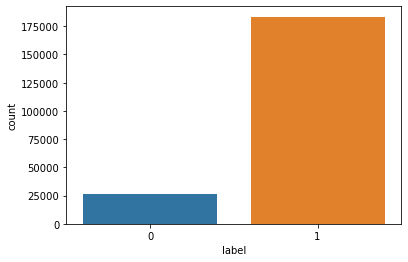

In [12]:
sns.countplot(df['label'])

In [13]:
# Removing unrequired columns
df.drop(["pcircle"],axis=1,inplace=True)
df.drop(["pdate"],axis=1,inplace=True)
df.drop(["msisdn"],axis=1,inplace=True)
df.drop(["last_rech_date_ma","last_rech_date_da"],axis=1,inplace=True)
df.drop(["payback30","payback90"],axis=1,inplace=True)

In [14]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
0,0,272.0,3055.050000,3065.150000,220.13,260.13,1539,2,21.0,3078.0,1539.0,7.50,2,21,3078,1539.0,7.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,5787,1,0.0,5787.0,5787.0,61.04,1,0,5787,5787.0,61.04,0.0,0.0,0,0,1,12,12.0,0.0,1.0,12,12,0.0
2,1,535.0,1398.000000,1398.000000,900.13,900.13,1539,1,0.0,1539.0,1539.0,66.32,1,0,1539,1539.0,66.32,0.0,0.0,0,0,1,6,6.0,0.0,1.0,6,6,0.0
3,1,241.0,21.228000,21.228000,159.42,159.42,947,0,0.0,0.0,0.0,0.00,1,0,947,947.0,2.50,0.0,0.0,0,0,2,12,6.0,0.0,2.0,12,6,0.0
4,1,947.0,150.619333,150.619333,1098.90,1098.90,2309,7,2.0,20029.0,2309.0,29.00,8,2,23496,2888.0,35.00,0.0,0.0,0,0,7,42,6.0,0.0,7.0,42,6,0.0


In [15]:
from sklearn.preprocessing import LabelEncoder

df = df.copy()
le = LabelEncoder()
for column in df.columns:
    df[column] = le.fit_transform(df[column])
df.head() 

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
0,0,279,80180,76157,13778,14851,14,2,21,135,63,1698,2,21,167,74,1726,0,0,0,0,2,2,1,0,2,2,1,0
1,1,719,121168,121370,87076,83052,38,1,0,682,333,6220,1,0,880,385,6426,0,0,0,0,1,2,2,0,1,2,2,0
2,1,542,64973,62450,38625,34572,14,1,0,24,63,6595,1,0,31,74,6807,0,0,0,0,1,1,1,0,1,1,1,0
3,1,248,14732,14663,11258,11135,10,0,0,0,0,1027,1,0,15,36,1290,0,0,0,0,2,2,1,0,2,2,1,0
4,1,954,46794,46656,44372,39798,23,7,2,6758,119,3681,8,2,12857,187,4288,0,0,0,0,7,7,1,0,7,7,1,0


In [16]:
# Checking Statistical Summary
df.describe()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.00000
mean,0.875177,690.289094,66544.667766,67044.634181,51616.229192,54335.257556,15.121483,3.976521,6.663462,1802.099846,81.612730,5766.498070,6.312677,7.716780,5169.204945,98.725769,5831.339153,2.730368,2.755421,0.041356,0.045197,2.758852,2.991884,3.731675,0.108043,6.601552,3.940771,1.117189,0.09214
std,0.330519,572.221653,44081.531271,45807.105446,38632.931157,41282.497664,13.008039,4.220550,44.912227,2947.494483,107.674646,5067.830914,7.135586,12.590251,7471.143785,127.564556,4767.192396,43.776964,44.148416,0.387635,0.924770,2.552568,2.894914,42.730264,0.435900,46.452530,4.409808,0.350644,0.40119
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000
25%,1.000000,253.000000,25122.000000,25107.000000,16299.000000,16270.000000,4.000000,1.000000,0.000000,25.000000,11.000000,2009.000000,2.000000,0.000000,87.000000,18.000000,2374.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.00000
50%,1.000000,534.000000,65783.000000,63332.000000,43900.000000,45357.000000,14.000000,3.000000,2.000000,378.000000,63.000000,4090.000000,4.000000,2.000000,1489.000000,74.000000,4370.000000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,1.000000,0.000000,2.000000,2.000000,1.000000,0.00000
75%,1.000000,989.000000,104950.000000,104660.000000,83566.000000,88423.000000,23.000000,5.000000,6.000000,2151.000000,93.000000,7663.000000,8.000000,8.000000,7339.000000,108.000000,7701.000000,0.000000,0.000000,0.000000,0.000000,4.000000,4.000000,1.000000,0.000000,5.000000,5.000000,1.000000,0.00000
max,1.000000,4506.000000,146327.000000,155482.000000,131337.000000,139035.000000,69.000000,70.000000,1082.000000,15140.000000,509.000000,23906.000000,109.000000,88.000000,31770.000000,607.000000,22693.000000,1065.000000,1071.000000,26.000000,45.000000,39.000000,47.000000,1049.000000,5.000000,1109.000000,68.000000,2.000000,5.00000


In [17]:
# Checking Correlation
df.corr()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
label,1.000000,0.066149,0.261717,0.262751,0.096496,0.111128,0.169902,0.239192,0.019279,0.186063,0.132773,0.180617,0.238164,0.084385,0.216044,0.114257,0.175216,0.003888,-0.000744,0.003127,-0.005784,0.196413,0.197373,0.000810,0.044595,0.018315,0.199860,0.084144,0.035750
aon,0.066149,1.000000,0.078584,0.078796,0.057743,0.063708,0.081073,-0.004206,0.007570,0.035528,0.083262,0.030634,0.013273,0.029914,0.058197,0.090669,0.028863,0.000961,-0.000096,0.009636,0.009753,0.027602,0.029307,-0.002758,0.002027,0.007184,0.052344,0.031109,-0.003147
daily_decr30,0.261717,0.078584,1.000000,0.995375,0.598928,0.655851,0.304148,0.441206,0.016709,0.471762,0.277552,0.177047,0.571241,-0.016608,0.634476,0.245816,0.137720,0.003700,-0.001545,0.057184,0.032570,0.363777,0.426286,0.000221,0.003217,0.042068,0.529087,0.385649,-0.032901
daily_decr90,0.262751,0.078796,0.995375,1.000000,0.602190,0.665242,0.306554,0.443139,0.016420,0.481058,0.280071,0.177052,0.588451,-0.024189,0.658996,0.250256,0.138410,0.003648,-0.001578,0.054557,0.030524,0.363260,0.430226,0.000544,0.004969,0.043429,0.545076,0.397105,-0.033320
rental30,0.096496,0.057743,0.598928,0.602190,1.000000,0.970217,0.156856,0.357201,0.010204,0.350067,0.134957,0.087571,0.429889,-0.034409,0.441250,0.102321,0.052020,0.000897,-0.001737,0.068466,0.054015,0.284933,0.331076,-0.000055,-0.027046,0.032009,0.394622,0.273433,-0.052447
rental90,0.111128,0.063708,0.655851,0.665242,0.970217,1.000000,0.157829,0.347400,0.011484,0.333676,0.129113,0.089194,0.459795,-0.034980,0.465515,0.101061,0.054628,0.001166,-0.001516,0.067449,0.051674,0.272796,0.326358,-0.000303,-0.019119,0.033873,0.420557,0.295951,-0.050847
last_rech_amt_ma,0.169902,0.081073,0.304148,0.306554,0.156856,0.157829,1.000000,0.017999,0.012824,0.447798,0.790436,0.227636,0.036255,0.127365,0.434482,0.801069,0.263470,-0.001579,-0.002063,0.017777,0.015471,-0.002342,0.039067,0.002524,0.029345,0.002399,0.041696,0.171669,0.019545
cnt_ma_rech30,0.239192,-0.004206,0.441206,0.443139,0.357201,0.347400,0.017999,1.000000,-0.003963,0.654281,-0.043296,0.169140,0.886059,-0.153823,0.601694,-0.078987,0.135575,0.002389,-0.002219,0.012305,0.007501,0.770173,0.756671,0.001573,-0.067499,0.061844,0.689793,0.174963,-0.071990
fr_ma_rech30,0.019279,0.007570,0.016709,0.016420,0.010204,0.011484,0.012824,-0.003963,1.000000,-0.000021,0.018787,0.013681,-0.001615,0.035886,0.003884,0.012788,0.004074,0.000319,-0.002557,0.002386,-0.001867,-0.001466,-0.001080,-0.000522,0.002403,0.002438,0.002150,0.004000,-0.000360
sumamnt_ma_rech30,0.186063,0.035528,0.471762,0.481058,0.350067,0.333676,0.447798,0.654281,-0.000021,1.000000,0.482681,0.230943,0.598083,-0.096676,0.875827,0.427865,0.206413,0.001027,-0.001682,0.019072,0.016137,0.502595,0.542747,0.004318,-0.035487,0.042814,0.497335,0.277030,-0.042401


<AxesSubplot:>

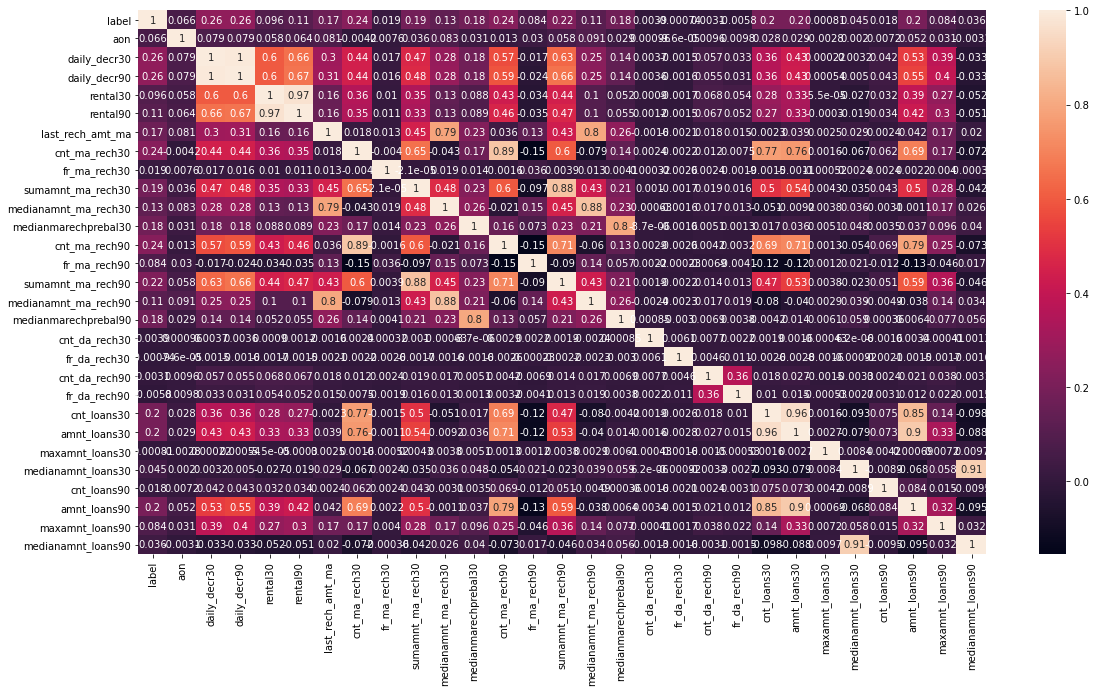

In [18]:
# Plotting correlation heatmap
plt.figure(figsize=[19,10],facecolor='white')
sns.heatmap(df.corr(),annot=True)

array([[<AxesSubplot:title={'center':'label'}>,
        <AxesSubplot:title={'center':'aon'}>,
        <AxesSubplot:title={'center':'daily_decr30'}>,
        <AxesSubplot:title={'center':'daily_decr90'}>,
        <AxesSubplot:title={'center':'rental30'}>,
        <AxesSubplot:title={'center':'rental90'}>,
        <AxesSubplot:title={'center':'last_rech_amt_ma'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'fr_ma_rech30'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech30'}>],
       [<AxesSubplot:title={'center':'medianamnt_ma_rech30'}>,
        <AxesSubplot:title={'center':'medianmarechprebal30'}>,
        <AxesSubplot:title={'center':'cnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'fr_ma_rech90'}>,
        <AxesSubplot:title={'center':'sumamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianamnt_ma_rech90'}>,
        <AxesSubplot:title={'center':'medianmarechprebal90'}>,
        <AxesSubplot:title={'center':'cn

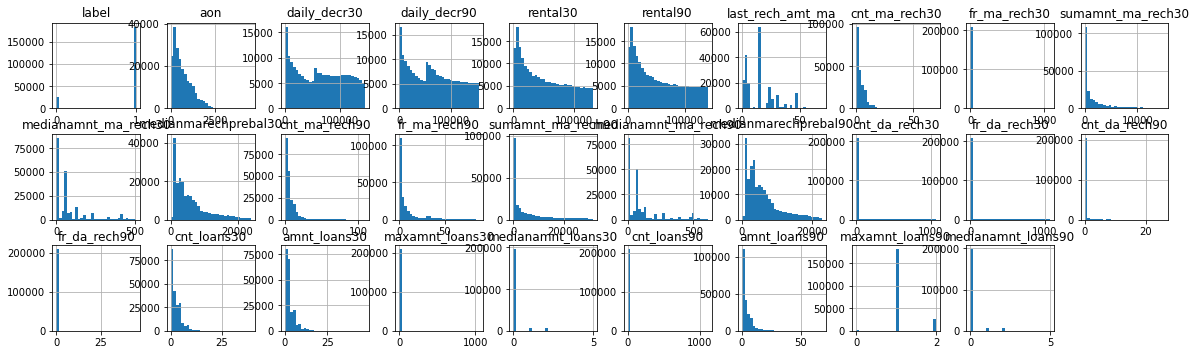

In [19]:
# plotting a histogram
df.hist(figsize=(20,20), grid = True, layout = (10,10), bins = 30)

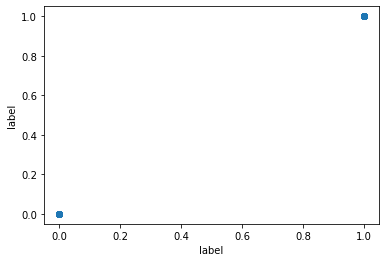

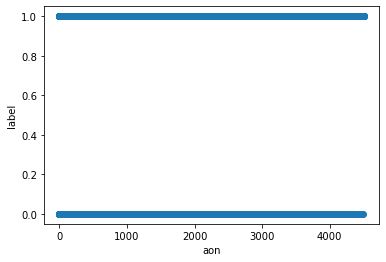

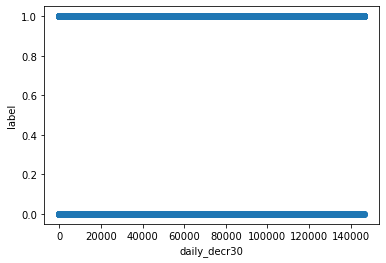

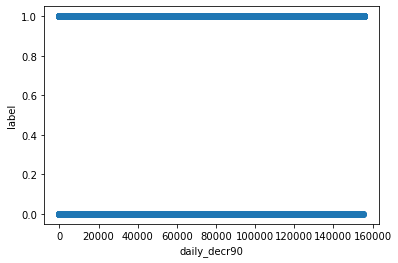

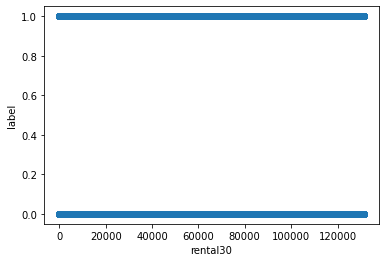

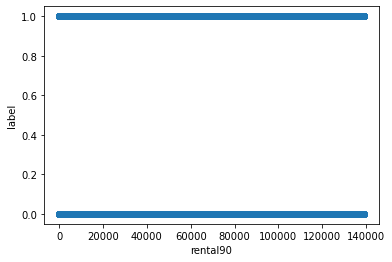

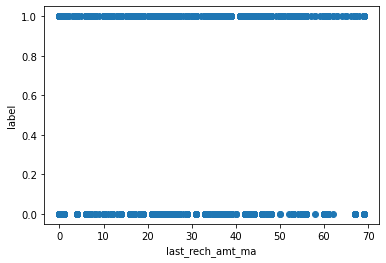

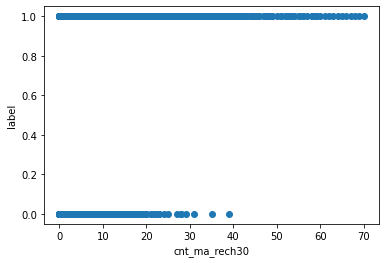

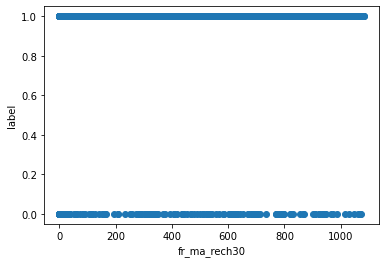

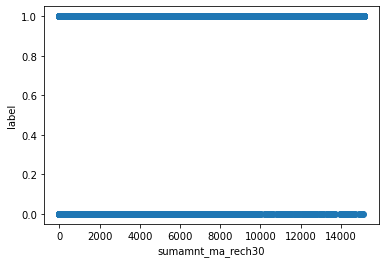

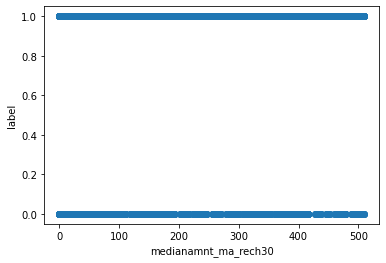

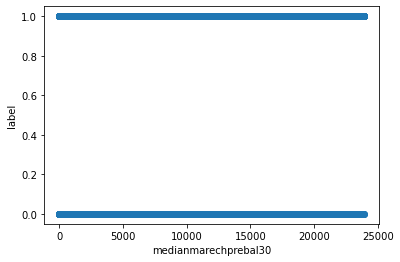

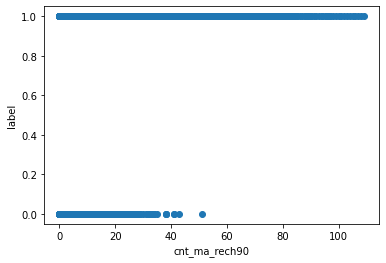

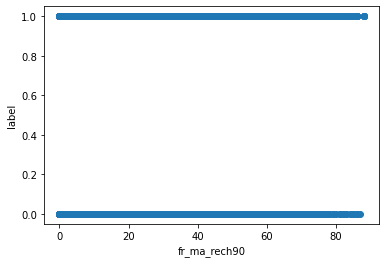

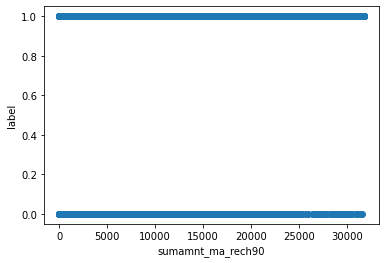

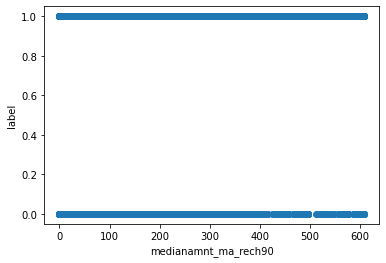

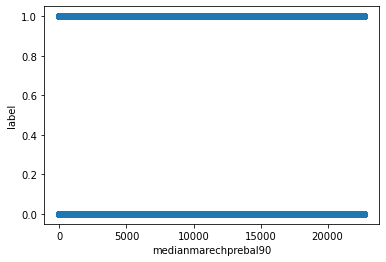

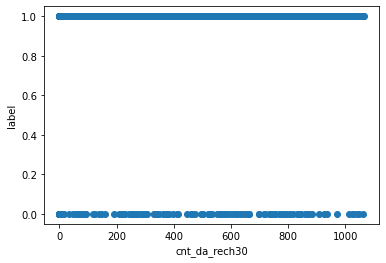

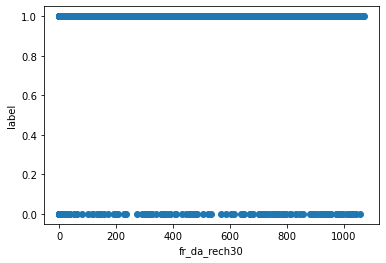

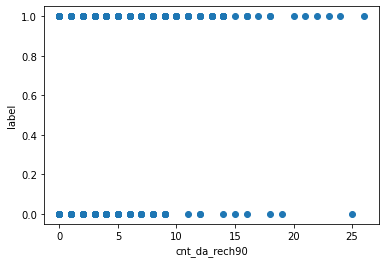

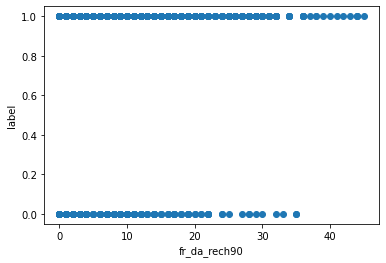

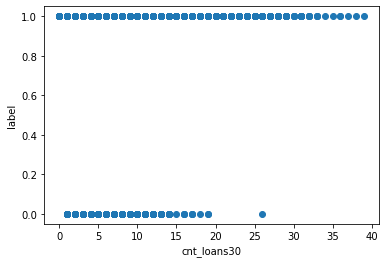

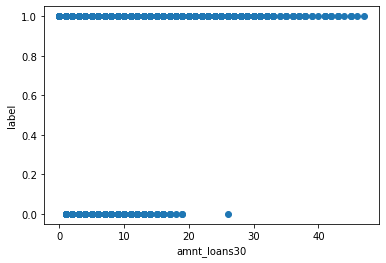

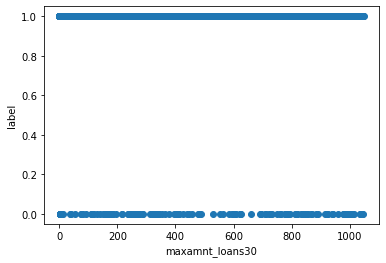

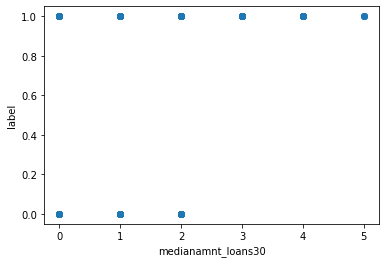

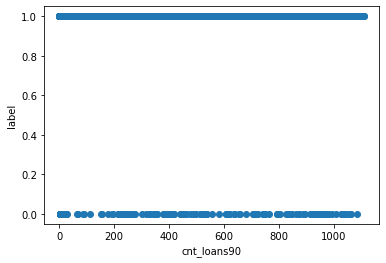

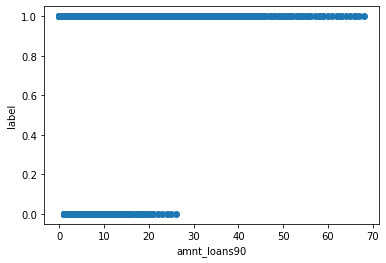

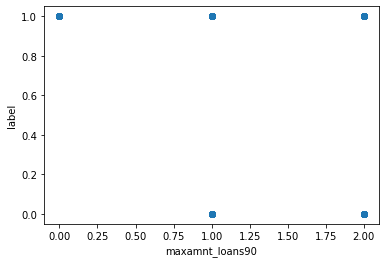

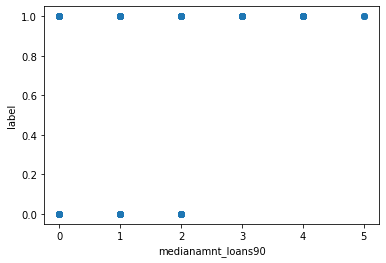

In [20]:
# plotting the Scatter plot between all feature variables and target variable

for col in df.describe().columns:
    df=df.copy()
    plt.scatter(df[col],df['label'])
    plt.xlabel(col)
    plt.ylabel('label')
    plt.show()

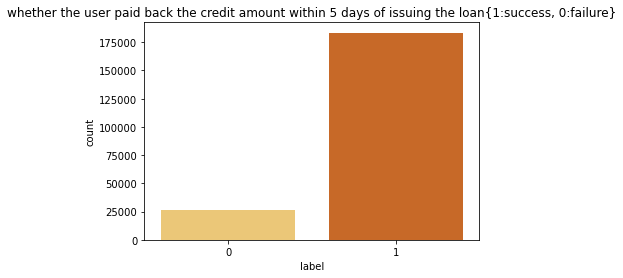

1    183431
0     26162
Name: label, dtype: int64
[0 1]


In [21]:
sns.countplot(x="label",data=df,palette="YlOrBr")
plt.title('whether the user paid back the credit amount within 5 days of issuing the loan{1:success, 0:failure}')
plt.show()
print(df["label"].value_counts())
print(df["label"].unique())

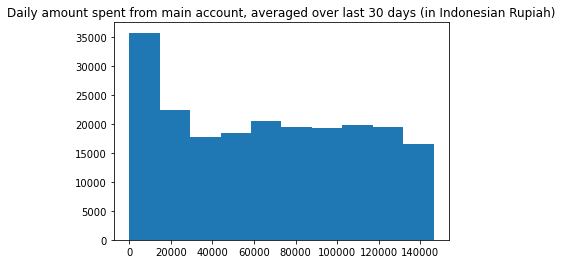

[ 80180 121168  64973 ... 120489 122031  90371]


In [22]:
plt.hist(df["daily_decr30"])
plt.title("Daily amount spent from main account, averaged over last 30 days (in Indonesian Rupiah)")
plt.show()
print(df["daily_decr30"].unique())

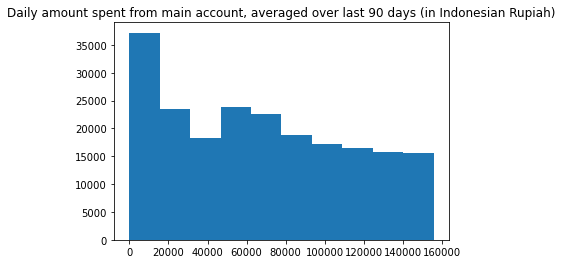

[ 76157 121370  62450 ...  46756 122679  86496]


In [23]:
plt.hist(df["daily_decr90"])
plt.title("Daily amount spent from main account, averaged over last 90 days (in Indonesian Rupiah)")
plt.show()
print(df["daily_decr90"].unique())

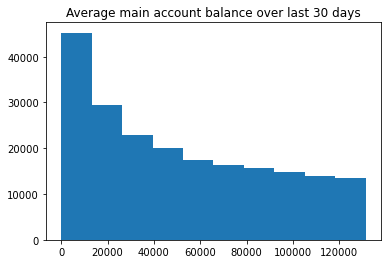

[ 13778  87076  38625 ... 104193  21540  24242]


In [24]:
plt.hist(df["rental30"])
plt.title("Average main account balance over last 30 days")
plt.show()
print(df["rental30"].unique())

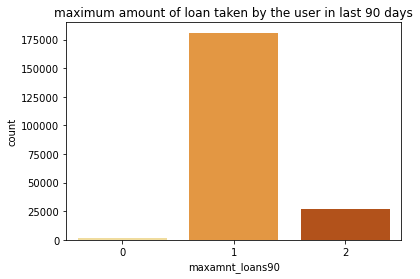

[1 2 0]


In [25]:
sns.countplot(x="maxamnt_loans90",data=df,palette="YlOrBr")
plt.title("maximum amount of loan taken by the user in last 90 days")
plt.show()
print(df["maxamnt_loans90"].unique())

In [26]:
df.skew()

label                   -2.270254
aon                      1.806204
daily_decr30             0.087551
daily_decr90             0.228175
rental30                 0.449031
rental90                 0.466723
last_rech_amt_ma         1.074621
cnt_ma_rech30            2.684106
fr_ma_rech30            17.638960
sumamnt_ma_rech30        2.269945
medianamnt_ma_rech30     2.035013
medianmarechprebal30     1.416150
cnt_ma_rech90            2.886544
fr_ma_rech90             2.285423
sumamnt_ma_rech90        1.732703
medianamnt_ma_rech90     2.086845
medianmarechprebal90     1.372093
cnt_da_rech30           18.137741
fr_da_rech30            18.084817
cnt_da_rech90           23.642903
fr_da_rech90            26.899282
cnt_loans30              2.685234
amnt_loans30             2.955552
maxamnt_loans30         18.285158
medianamnt_loans30       4.541572
cnt_loans90             17.607075
amnt_loans90             3.136189
maxamnt_loans90          1.678304
medianamnt_loans90       4.883389
dtype: float64

label                     AxesSubplot(0.125,0.816017;0.0824468x0.0639831)
aon                     AxesSubplot(0.223936,0.816017;0.0824468x0.0639...
daily_decr30            AxesSubplot(0.322872,0.816017;0.0824468x0.0639...
daily_decr90            AxesSubplot(0.421809,0.816017;0.0824468x0.0639...
rental30                AxesSubplot(0.520745,0.816017;0.0824468x0.0639...
rental90                AxesSubplot(0.619681,0.816017;0.0824468x0.0639...
last_rech_amt_ma        AxesSubplot(0.718617,0.816017;0.0824468x0.0639...
cnt_ma_rech30           AxesSubplot(0.817553,0.816017;0.0824468x0.0639...
fr_ma_rech30              AxesSubplot(0.125,0.739237;0.0824468x0.0639831)
sumamnt_ma_rech30       AxesSubplot(0.223936,0.739237;0.0824468x0.0639...
medianamnt_ma_rech30    AxesSubplot(0.322872,0.739237;0.0824468x0.0639...
medianmarechprebal30    AxesSubplot(0.421809,0.739237;0.0824468x0.0639...
cnt_ma_rech90           AxesSubplot(0.520745,0.739237;0.0824468x0.0639...
fr_ma_rech90            AxesSubplot(0.

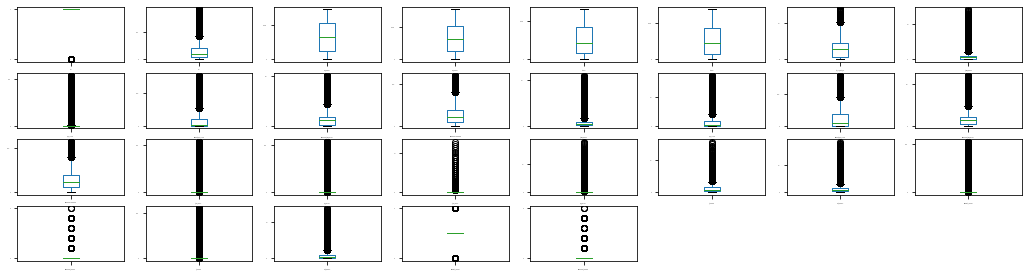

In [27]:
# Checking Outliers
df.plot(kind='box',subplots=True,layout=(10,8),sharex=False,fontsize=1,figsize=(18,12))

From the above, we can see that there are outliers in our data, which we need to remove before moving further.

In [28]:
# Removing outliers
from scipy.stats import zscore
z=np.abs(zscore(df))
z

array([[2.64789583, 0.71876007, 0.30932149, ..., 0.44010435, 0.33421157,
        0.22966837],
       [0.37765836, 0.05017457, 1.23914621, ..., 0.44010435, 2.51768994,
        0.22966837],
       [0.37765836, 0.25914686, 0.03565374, ..., 0.66687215, 0.33421157,
        0.22966837],
       ...,
       [0.37765836, 0.57619576, 1.2237429 , ..., 1.14727024, 2.51768994,
        0.22966837],
       [0.37765836, 1.83270487, 1.25872362, ..., 0.01343125, 2.51768994,
        0.22966837],
       [0.37765836, 1.56882048, 0.54050729, ..., 0.21333655, 2.51768994,
        0.22966837]])

In [29]:
threshold=3
print(np.where(z>3))

(array([    21,     22,     28, ..., 209587, 209587, 209587], dtype=int64), array([13, 13,  9, ..., 11, 24, 28], dtype=int64))


In [30]:
z[6][8]

0.14836667805963635

In [31]:
df_new=df[(z<3).all(axis=1)]
df_new

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
0,0,279,80180,76157,13778,14851,14,2,21,135,63,1698,2,21,167,74,1726,0,0,0,0,2,2,1,0,2,2,1,0
1,1,719,121168,121370,87076,83052,38,1,0,682,333,6220,1,0,880,385,6426,0,0,0,0,1,2,2,0,1,2,2,0
2,1,542,64973,62450,38625,34572,14,1,0,24,63,6595,1,0,31,74,6807,0,0,0,0,1,1,1,0,1,1,1,0
3,1,248,14732,14663,11258,11135,10,0,0,0,0,1027,1,0,15,36,1290,0,0,0,0,2,2,1,0,2,2,1,0
4,1,954,46794,46656,44372,39798,23,7,2,6758,119,3681,8,2,12857,187,4288,0,0,0,0,7,7,1,0,7,7,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,1,411,46895,46756,44066,39548,31,3,2,2356,180,8188,3,2,3328,203,8496,0,0,0,0,2,2,1,0,2,2,1,0
209589,1,1082,22744,22627,59433,53907,6,4,1,145,15,11204,6,2,337,18,9525,0,0,0,0,3,3,1,0,3,3,1,0
209590,1,1020,120489,120693,104193,116375,14,5,8,1882,63,5463,11,5,9270,74,5306,0,0,0,0,4,7,2,0,6,9,2,0
209591,1,1739,122031,122679,21540,36833,6,5,4,3131,15,11302,6,4,8802,150,8954,0,0,1,0,2,3,2,0,3,4,2,0


In [32]:
df_new.shape

(164915, 29)

In [33]:
# Checking the percentage of loss data
loss_percent =(209593-164915)/209593*100
print(loss_percent)

21.3165516023913


In [34]:
# Removing skewness
df_sk=['fr_ma_rech30','cnt_da_rech30','fr_da_rech30','cnt_da_rech90','fr_da_rech90','maxamnt_loans30','cnt_loans90']
for val in df_sk:
    if df_new.skew().loc[val]>0.55:
        df_new[val]=np.sqrt(df_new[val])

In [35]:
df_new.skew()

label                   -2.067722
aon                      0.971457
daily_decr30             0.152930
daily_decr90             0.285786
rental30                 0.563169
rental90                 0.583839
last_rech_amt_ma         1.002554
cnt_ma_rech30            1.140229
fr_ma_rech30             0.653879
sumamnt_ma_rech30        2.281913
medianamnt_ma_rech30     2.133111
medianmarechprebal30     1.351626
cnt_ma_rech90            1.308226
fr_ma_rech90             2.021784
sumamnt_ma_rech90        1.939575
medianamnt_ma_rech90     2.208341
medianmarechprebal90     1.322309
cnt_da_rech30           34.124462
fr_da_rech30            47.000309
cnt_da_rech90            6.905515
fr_da_rech90             0.000000
cnt_loans30              1.440533
amnt_loans30             1.423396
maxamnt_loans30         21.539184
medianamnt_loans30       5.296261
cnt_loans90              1.546852
amnt_loans90             1.681070
maxamnt_loans90          2.644910
medianamnt_loans90       6.037528
dtype: float64

In [36]:
df_new.drop(['fr_da_rech30'], axis=1,inplace=True)

In [37]:
df_new.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
0,0,279,80180,76157,13778,14851,14,2,4.582576,135,63,1698,2,21,167,74,1726,0.0,0.0,0,2,2,1.000000,0,1.414214,2,1,0
1,1,719,121168,121370,87076,83052,38,1,0.000000,682,333,6220,1,0,880,385,6426,0.0,0.0,0,1,2,1.414214,0,1.000000,2,2,0
2,1,542,64973,62450,38625,34572,14,1,0.000000,24,63,6595,1,0,31,74,6807,0.0,0.0,0,1,1,1.000000,0,1.000000,1,1,0
3,1,248,14732,14663,11258,11135,10,0,0.000000,0,0,1027,1,0,15,36,1290,0.0,0.0,0,2,2,1.000000,0,1.414214,2,1,0
4,1,954,46794,46656,44372,39798,23,7,1.414214,6758,119,3681,8,2,12857,187,4288,0.0,0.0,0,7,7,1.000000,0,2.645751,7,1,0


In [38]:
#feature selection
x=df_new.drop('label',axis=1)
y=df['label']

In [39]:
# Scaling the data
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(df)
x=pd.DataFrame(x,columns=df.columns)
x

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_amt_ma,cnt_ma_rech30,fr_ma_rech30,sumamnt_ma_rech30,medianamnt_ma_rech30,medianmarechprebal30,cnt_ma_rech90,fr_ma_rech90,sumamnt_ma_rech90,medianamnt_ma_rech90,medianmarechprebal90,cnt_da_rech30,fr_da_rech30,cnt_da_rech90,fr_da_rech90,cnt_loans30,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90
0,-2.647896,-0.718760,0.309321,0.198930,-0.979432,-0.956443,-0.086215,-0.468310,0.319213,-0.565600,-0.172861,-0.802810,-0.604392,1.055043,-0.669538,-0.193830,-0.861167,-0.06237,-0.062413,-0.106689,-0.048874,-0.297290,-0.342631,-0.063929,-0.247862,-0.099059,-0.440104,-0.334212,-0.229668
1,0.377658,0.050175,1.239146,1.185962,0.917866,0.695617,1.758802,-0.705247,-0.148367,-0.380019,2.334699,0.089487,-0.744535,-0.612919,-0.574104,2.244157,0.124741,-0.06237,-0.062413,-0.106689,-0.048874,-0.689053,-0.342631,-0.040526,-0.247862,-0.120587,-0.440104,2.517690,-0.229668
2,0.377658,-0.259147,-0.035654,-0.100304,-0.336274,-0.478733,-0.086215,-0.705247,-0.148367,-0.603260,-0.172861,0.163483,-0.744535,-0.612919,-0.687742,-0.193830,0.204662,-0.06237,-0.062413,-0.106689,-0.048874,-0.689053,-0.688065,-0.063929,-0.247862,-0.120587,-0.666872,-0.334212,-0.229668
3,0.377658,-0.772935,-1.175385,-1.143529,-1.044661,-1.046457,-0.393718,-0.942183,-0.148367,-0.611402,-0.757959,-0.935215,-0.744535,-0.612919,-0.689883,-0.491719,-0.952626,-0.06237,-0.062413,-0.106689,-0.048874,-0.297290,-0.342631,-0.063929,-0.247862,-0.099059,-0.440104,-0.334212,-0.229668
4,0.377658,0.460856,-0.448050,-0.445099,-0.187515,-0.352142,0.605667,0.716372,-0.103835,1.681398,0.347225,-0.411518,0.236466,-0.454065,1.029001,0.691998,-0.323743,-0.06237,-0.062413,-0.106689,-0.048874,1.661526,1.384540,-0.063929,-0.247862,0.008578,0.693735,-0.334212,-0.229668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
209588,0.377658,-0.488080,-0.445758,-0.442916,-0.195436,-0.358198,1.220672,-0.231374,-0.103835,0.187923,0.913748,0.477819,-0.464249,-0.454065,-0.246443,0.817425,0.558959,-0.06237,-0.062413,-0.106689,-0.048874,-0.297290,-0.342631,-0.063929,-0.247862,-0.099059,-0.440104,-0.334212,-0.229668
209589,0.377658,0.684546,-0.993631,-0.969669,0.202335,-0.010374,-0.701221,0.005563,-0.126101,-0.562208,-0.618650,1.072947,-0.043820,-0.454065,-0.646784,-0.632824,0.774810,-0.06237,-0.062413,-0.106689,-0.048874,0.094473,0.002803,-0.063929,-0.247862,-0.077532,-0.213337,-0.334212,-0.229668
209590,0.377658,0.576196,1.223743,1.171183,1.360935,1.502813,-0.086215,0.242499,0.029759,0.027108,-0.172861,-0.059887,0.656895,-0.215785,0.548886,-0.193830,-0.110199,-0.06237,-0.062413,-0.106689,-0.048874,0.486236,1.384540,-0.040526,-0.247862,-0.012950,1.147270,2.517690,-0.229668
209591,0.377658,1.832705,1.258724,1.214539,-0.778515,-0.423964,-0.701221,0.242499,-0.059304,0.450859,-0.618650,1.092285,-0.043820,-0.295212,0.486245,0.401948,0.655033,-0.06237,-0.062413,2.473062,-0.048874,-0.297290,0.002803,-0.040526,-0.247862,-0.077532,0.013431,2.517690,-0.229668


In [40]:
# PCA
# Importing and fitting data to pca
from sklearn.decomposition import PCA

pca =PCA(n_components=20)
pca.fit(x)

PCA(n_components=20)

In [41]:
pca.explained_variance_ratio_

array([0.25023457, 0.11606033, 0.06578336, 0.06306645, 0.05208485,
       0.04640776, 0.03769135, 0.03473884, 0.03450842, 0.03432428,
       0.0342366 , 0.03410224, 0.03298715, 0.02980933, 0.02875134,
       0.02191243, 0.02147368, 0.01911678, 0.00951012, 0.00790004])

In [42]:
x_returned_pca=pca.transform(x)

In [43]:
x_returned_pca.shape

(209593, 20)

In [44]:
# Important feature using ExtraTreesRegressor

from sklearn.ensemble import ExtraTreesRegressor
selection = ExtraTreesRegressor()
selection.fit(x,y)

ExtraTreesRegressor()

In [45]:
print(selection.feature_importances_)

[1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]


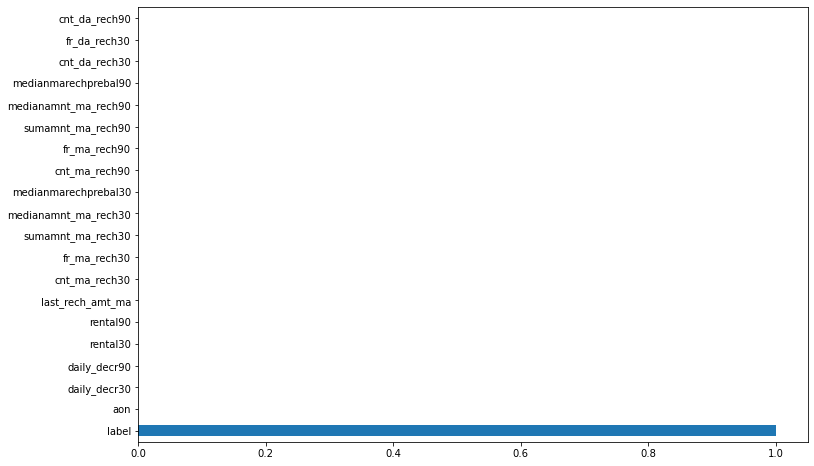

In [46]:
# Plotting graph  for feature importance
plt.figure(figsize = (12,8))
feat_imp = pd.Series(selection.feature_importances_ , index= x.columns)
feat_imp.nlargest(20).plot(kind ='barh')
plt.show()

In [47]:
! pip install imblearn

In [48]:
from imblearn.over_sampling import SMOTE

In [49]:
SM=SMOTE()
x_under,y_under =SM.fit_resample(x,y)

In [50]:
y_under.value_counts()

0    183431
1    183431
Name: label, dtype: int64

In [51]:
x=x_under
x.shape

(366862, 29)

In [52]:
y=y_under
y.shape

(366862,)

In [53]:
y=y.values.reshape(-1,1)

In [54]:
y.shape

(366862, 1)

In [55]:
maxAccu = 0
maxRS = 0
for i in range(1,150):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=i)
    rf= RandomForestClassifier()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc > maxAccu:
        maxAccu = acc
        maxRS = i
        
print("Best accuracy is ", maxAccu, " on Random_state", maxRS)

Best accuracy is  1.0  on Random_state 1


In [56]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size =.24, random_state=maxRS)

In [57]:
from sklearn.metrics import classification_report, confusion_matrix
lr = LogisticRegression()

# feeding the training set into the model
lr.fit(x_train, y_train)

# predicting the results for the test set
y_pred = lr.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", lr.score(x_train, y_train))
print("Testing accuracy :", lr.score(x_test, y_test))

# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

Training accuracy : 1.0
Testing accuracy : 1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44003
           1       1.00      1.00      1.00     44044

    accuracy                           1.00     88047
   macro avg       1.00      1.00      1.00     88047
weighted avg       1.00      1.00      1.00     88047

[[44003     0]
 [    0 44044]]


In [58]:
# USING DECISION TREE
from sklearn.tree import DecisionTreeClassifier


model = DecisionTreeClassifier()
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [59]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44003
           1       1.00      1.00      1.00     44044

    accuracy                           1.00     88047
   macro avg       1.00      1.00      1.00     88047
weighted avg       1.00      1.00      1.00     88047

[[44003     0]
 [    0 44044]]


In [60]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier


model = RandomForestClassifier(n_estimators = 200)
model.fit(x_train, y_train)
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [61]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44003
           1       1.00      1.00      1.00     44044

    accuracy                           1.00     88047
   macro avg       1.00      1.00      1.00     88047
weighted avg       1.00      1.00      1.00     88047

[[44003     0]
 [    0 44044]]


In [62]:
from sklearn.svm import SVC

# creating the model
model = SVC()

# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 0.9999964133923928
Testing accuracy : 0.9999772848592229


In [63]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44003
           1       1.00      1.00      1.00     44044

    accuracy                           1.00     88047
   macro avg       1.00      1.00      1.00     88047
weighted avg       1.00      1.00      1.00     88047

[[44001     2]
 [    0 44044]]


In [64]:
# Ada Boost Classifier
from sklearn.ensemble import AdaBoostRegressor
model = AdaBoostRegressor()



# feeding the training set into the model
model.fit(x_train, y_train)

# predicting the results for the test set
y_pred = model.predict(x_test)

# calculating the training and testing accuracies
print("Training accuracy :", model.score(x_train, y_train))
print("Testing accuracy :", model.score(x_test, y_test))

Training accuracy : 1.0
Testing accuracy : 1.0


In [65]:
# classification report
print(classification_report(y_test, y_pred))

# confusion matrix
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     44003
           1       1.00      1.00      1.00     44044

    accuracy                           1.00     88047
   macro avg       1.00      1.00      1.00     88047
weighted avg       1.00      1.00      1.00     88047

[[44003     0]
 [    0 44044]]


In [66]:
from sklearn.model_selection import RandomizedSearchCV


n_estimators = [int(x) for x in np.linspace(start = 200, stop = 1000, num = 10)]

max_features = ['auto', 'sqrt']

max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)

min_samples_split = [2, 5, 10]

min_samples_leaf = [1, 2, 4]

bootstrap = [True, False]

random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [200, 288, 377, 466, 555, 644, 733, 822, 911, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


In [67]:
rf1=RandomForestRegressor()
rf_randomized=RandomizedSearchCV(estimator=rf1,param_distributions=random_grid,n_iter=100,cv=3,verbose=2,
                               random_state=100,n_jobs=-1)

In [ ]:
rf_randomized.fit(x_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [ ]:
rf_randomized.best_params_

In [ ]:
rf_final=rf_randomized.best_estimator_

In [ ]:
y_pred_random=rf_final.predict(x_test)

In [ ]:
# AUC ROC
auc = roc_auc_score(y_test, y_pred)
auc

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

In [ ]:
fpr

In [ ]:
tpr

In [ ]:
thresholds

In [ ]:
# Plotting AUC ROC Curve
plt.plot(fpr, tpr, color='orange',label='ROC')
plt.plot([0, 1],[0, 1], color='green', linestyle='--', label='ROC curve (area = %0.3f)'% auc)
plt.xlabel('False Positive Rate')
plt.ylabel(' True Positive Rate')
plt.title(' Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [ ]:
# Saving The model
import pickle
file = 'MICRO CREDIT.pkl'
#save file
save = pickle.dump(RandomForestClassifier,open(file,'wb'))

In [ ]:
# Conclusion
a=np.array(y_test)
predicted=np.array(lr.predict(x_test))
df_com=pd.DataFrame({"original":a, "predicted":predicted}, index=range(len(a)))
df_com